In this notebook I demonstrate how the posterior can be used to marginalize over parameters we don't care about.
Also when we do that, we can impose informative priors on those parameters, which helps producing better constraints.

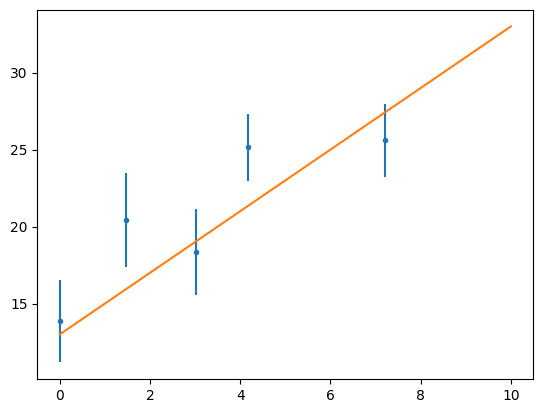

In [ ]:
%matplotlib inline
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import scipy.stats

A = 13
B = 2

# The model is y = A + B x
np.random.seed(1)
def gendata(N = 5):
    # generates the data
    err1 = 2
    err2 = 4

    # The true model is y = 13 + 2*x
    xs = np.random.uniform(0, 10, size=N)
    errs = np.random.uniform(err1, err2, size=N)
    ys = A + B * xs + np.random.normal(0, errs, size=N)
    # Generate the Data
    return xs, ys, errs

xs, ys, errs= gendata()

plt.errorbar(xs, ys, errs,fmt='.')
plt.plot(np.r_[0, 10], A + B * np.r_[0, 10])

# We will try to infer the intercept and marginalize away the slope


In [ ]:
def like(p, x, y, e):
    # The log-likelihood function
    return scipy.stats.norm(p[0] + p[1] * x, e).logpdf(y).sum()

def prior(p):
    # log-prior
    return (scipy.stats.uniform(5, 15).logpdf(p[0])+
    scipy.stats.uniform(0,4).logpdf(p[1]))

def posterior(p, x, y, e):
    # log-posterior
    return prior(p) + like(p,x,y,e)

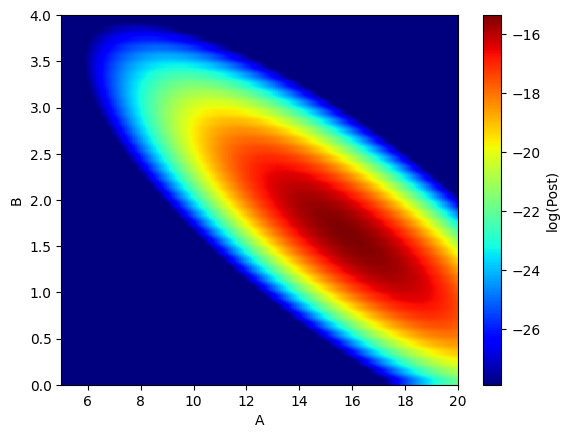

In [ ]:
# Define the grid of parameters
xgrid, ygrid = np.mgrid[5:20:0.1, 0:4:0.1]

# Evaluate the log-posterior on the grid
lpost_grid = np.zeros_like(xgrid)
for i in range(xgrid.shape[0]):
    for j in range(xgrid.shape[1]):
        lpost_grid[i,j]= posterior([xgrid[i,j], ygrid[i,j]],
                                    xs, ys, errs)

plt.imshow(lpost_grid.T, cmap='jet', extent=(5, 20, 0, 4),
           vmin=(lpost_grid).max(),
     vmax=(lpost_grid).max()-10, origin='lower',
           aspect='auto')

plt.colorbar(label='log(Post)');
plt.xlabel('A');plt.ylabel('B');

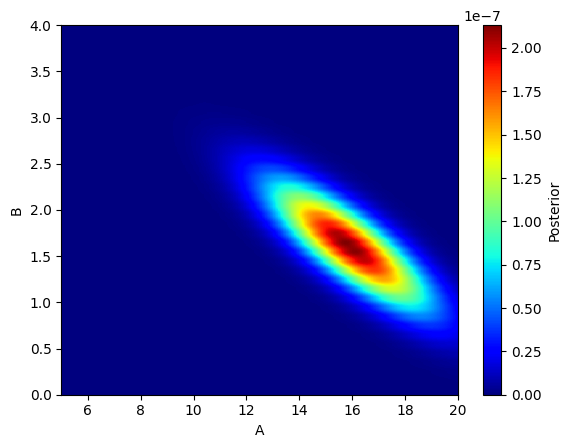

In [ ]:
plt.imshow(np.exp(lpost_grid.T), cmap='jet', extent=(5, 20, 0, 4),
           origin='lower',
           aspect='auto')

plt.colorbar(label='Posterior');
plt.xlabel('A');plt.ylabel('B');

Text(0.5, 0, 'A')

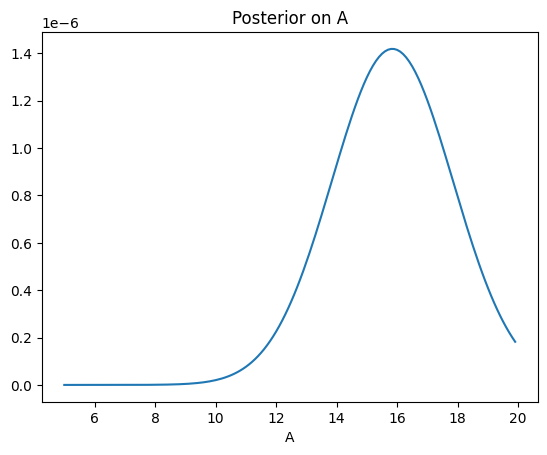

In [ ]:
post_grid = np.exp(lpost_grid)
# converts log likelihoods into linear likelihood!

# Do the marginalisation across B assuming uniform prior
marginal = post_grid.sum(axis=1)

plt.plot(xgrid[:, 0], marginal)
plt.title('Posterior on A')
plt.xlabel('A')

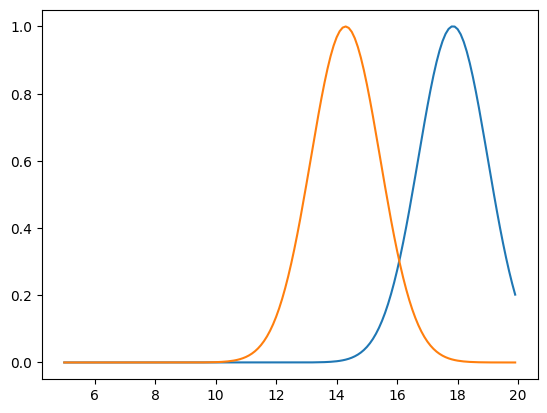

In [ ]:
# conditional probability distributions
plt.plot(xgrid[:, 0], post_grid[:,10]/post_grid[:,10].max())
plt.plot(xgrid[:, 0], post_grid[:,20]/post_grid[:,20].max())

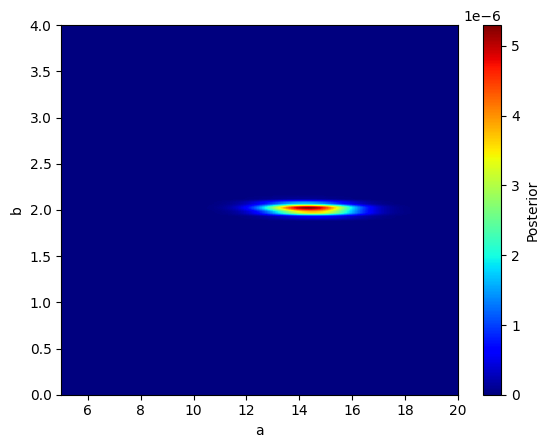

In [ ]:
# much more informative prior on b
def priorN(p):
    return (scipy.stats.uniform(5, 15).logpdf(p[0])+
    scipy.stats.norm(1.99, 0.04).logpdf(p[1]))

def posteriorN(p, x, y, e):
    return priorN(p)+ like(p,x,y,e)

# Define the grid of parameters
xgridN, ygridN = np.mgrid[5:20:0.1, 0:4:0.05]

# Evaluate the log-posterior on the grid
lpost_gridN = np.array([posteriorN([p0, p1], xs, ys, errs) for
            p0, p1 in zip(xgridN.flatten(), ygridN.flatten())]).reshape(xgridN.shape)


marginal_posteriorN = np.exp(lpost_gridN).sum(axis=1)

plt.imshow(np.exp(lpost_gridN.T), cmap='jet', extent=(5, 20, 0, 4),
           vmax=np.exp((lpost_gridN).max()),
     vmin=0, origin='lower',
           aspect='auto')

plt.colorbar(label='Posterior');
plt.xlabel('a');plt.ylabel('b');



Text(0.5, 1.0, 'Marginal posterior on A')

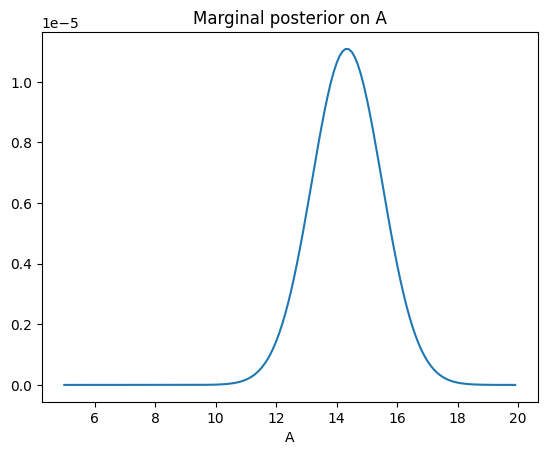

In [ ]:
# Do the marginalisation assuming narrow prior!
# The posterior is now more narrow as well!
plt.plot(xgrid[:, 0], marginal_posteriorN);
plt.xlabel('A')
plt.title('Marginal posterior on A')